# Membuat Graph & Ranking Kalimat

## Crawling Berita Online dan Tokenisasi

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords

# Unduh konten halaman web berita
url = "https://www.antaranews.com/berita/3821805/bmkg-prediksi-hujan-disertai-kilat-terjadi-di-jakarta-selatan?utm_source=antaranews&utm_medium=desktop&utm_campaign=terkini"
response = requests.get(url)
html = response.text

# Parsing halaman web menggunakan BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Ekstraksi teks dari elemen-elemen yang berisi berita
article = soup.find('div', class_="post-content clearfix")  # Sesuaikan dengan struktur HTML halaman web berita
article_text = article.get_text()

# Preprocessing
# Lowercasing
article_text = article_text.lower()

# Cleaning
article_text = ''.join(e for e in article_text if (e.isalnum() or e.isspace() or e == '.'))

# Hapus Angka
article_text = ''.join([char for char in article_text if not char.isdigit()])

# Tokenisasi teks menjadi kalimat menggunakan nltk
nltk.download('punkt')
sentences = nltk.sent_tokenize(article_text)

# Tokenisasi setiap kalimat menjadi kata-kata
words = [nltk.word_tokenize(sentence) for sentence in sentences]

# Stopword Removal
stop_words = set(stopwords.words('indonesian'))
filtered_sentences = []


for sentence in words:
    filtered_sentence = [word for word in sentence if word.lower() not in stop_words]
    filtered_sentences.append(filtered_sentence)


# Cetak kalimat-kalimat yang telah diproses
for filtered_sentence in filtered_sentences:
    print(filtered_sentence)

# Tutup respons setelah digunakan
response.close()

['jakarta', 'badan', 'meteorologi', 'klimatologi', 'geofisika', 'bmkg', 'ri', 'mengeluarkan', 'peringatan', 'potensi', 'hujan', 'disertai', 'kilat', 'angin', 'kencang', 'wilayah', 'kota', 'administrasi', 'jakarta', 'selatan', 'selasa', 'november', '.']
['mengutip', 'laporan', 'bmkg', 'melansir', 'laman', 'resminya', 'selasa', 'kondisi', 'cuaca', 'bersahabat', 'selasa', 'sore', 'menjelang', 'malam', '.']
['berdasarkan', 'kalkulasi', 'bmkg', 'laporannya', 'kondisi', 'cuaca', 'jakarta', 'selatan', 'diawali', 'cerah', 'berawan', 'pagi', 'berangsur', 'hujan', 'ringan', 'siang', 'malam', '.']
['bmkg', 'suhu', 'jakarta', 'selatan', 'berkisar', 'derajat', 'celcius', 'tingkat', 'kelembapan', 'kisaran', 'terendah', 'persen', 'tertinggi', 'persen', '.']
['tingkat', 'suhu', 'kelembapan', 'tercatat', 'wilayah', 'jakarta', 'timur', '.']
['suhu', 'kawasan', 'jakarta', 'utara', 'jakarta', 'pusat', 'diprediksi', 'rentang', 'derajat', 'kelembapan', 'udara', 'persen', '.']
['suhu', 'jakarta', 'barat', 'd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## TF-IDF

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi penghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Hitung TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Daftar kata kunci
feature_names = tfidf_vectorizer.get_feature_names_out()

# Konversi matriks TF-IDF menjadi bentuk yang lebih mudah dibaca
tfidf_values = tfidf_matrix.toarray()

# Cetak TF-IDF untuk setiap kata dalam setiap kalimat
for i, sentence in enumerate(sentences):
    print(f"Kalimat {i + 1}: {sentence}")
    for j, word in enumerate(feature_names):
        tfidf_value = tfidf_values[i][j]
        if tfidf_value > 0:
            print(f"{word}: {tfidf_value:.4f}")
    print()

Kalimat 1: 
				jakarta antara  badan meteorologi klimatologi dan geofisika bmkg ri mengeluarkan peringatan dini potensi hujan yang disertai kilat dan angin kencang yang akan terjadi di wilayah kota administrasi jakarta selatan selasa  november .
administrasi: 0.1962
akan: 0.1136
angin: 0.1962
antara: 0.1658
badan: 0.1962
bmkg: 0.1020
dan: 0.2547
di: 0.1020
dini: 0.1962
disertai: 0.1962
geofisika: 0.1962
hujan: 0.1441
jakarta: 0.2041
kencang: 0.1962
kilat: 0.1962
klimatologi: 0.1962
kota: 0.1658
mengeluarkan: 0.1962
meteorologi: 0.1962
november: 0.1962
peringatan: 0.1962
potensi: 0.1962
ri: 0.1962
selasa: 0.1441
selatan: 0.1441
terjadi: 0.1658
wilayah: 0.1658
yang: 0.3315

Kalimat 2: mengutip laporan bmkg yang melansir melalui laman resminya selasa disebutkan bahwa kondisi cuaca yang kurang bersahabat tersebut akan berlangsung pada selasa sore hingga menjelang malam.
akan: 0.1215
bahwa: 0.2098
berlangsung: 0.2098
bersahabat: 0.2098
bmkg: 0.1091
cuaca: 0.1772
disebutkan: 0.2098
hingga: 

## Cosine Similarity antar Kalimat

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Indeks kalimat yang akan dibandingkan
sentence1_index = 0
sentence2_index = 1

# Ambil vektor TF-IDF untuk kedua kalimat
tfidf_vector1 = tfidf_matrix[sentence1_index]
tfidf_vector2 = tfidf_matrix[sentence2_index]

# Hitung cosine similarity antara kedua vektor
similarity = cosine_similarity(tfidf_vector1, tfidf_vector2)

# Cetak hasil cosine similarity
print(f"Cosine Similarity antara Kalimat {sentence1_index + 1} dan Kalimat {sentence2_index + 1}: {similarity[0][0]:.4f}")


Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.1868


In [7]:
# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)

# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Cetak hasil similarity_matrix
num_sentences = len(sentences)  # Jumlah kalimat
for i in range(num_sentences):
    for j in range(i+1, num_sentences):
        similarity = similarity_matrix[i][j]
        print(f"Cosine Similarity antara Kalimat {i + 1} dan Kalimat {j + 1}: {similarity:.4f}")

Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.1868
Cosine Similarity antara Kalimat 1 dan Kalimat 3: 0.1031
Cosine Similarity antara Kalimat 1 dan Kalimat 4: 0.1432
Cosine Similarity antara Kalimat 1 dan Kalimat 5: 0.2170
Cosine Similarity antara Kalimat 1 dan Kalimat 6: 0.1334
Cosine Similarity antara Kalimat 1 dan Kalimat 7: 0.0640
Cosine Similarity antara Kalimat 1 dan Kalimat 8: 0.0348
Cosine Similarity antara Kalimat 1 dan Kalimat 9: 0.1429
Cosine Similarity antara Kalimat 2 dan Kalimat 3: 0.2320
Cosine Similarity antara Kalimat 2 dan Kalimat 4: 0.0168
Cosine Similarity antara Kalimat 2 dan Kalimat 5: 0.0645
Cosine Similarity antara Kalimat 2 dan Kalimat 6: 0.0000
Cosine Similarity antara Kalimat 2 dan Kalimat 7: 0.0000
Cosine Similarity antara Kalimat 2 dan Kalimat 8: 0.0372
Cosine Similarity antara Kalimat 2 dan Kalimat 9: 0.0641
Cosine Similarity antara Kalimat 3 dan Kalimat 4: 0.1389
Cosine Similarity antara Kalimat 3 dan Kalimat 5: 0.1247
Cosine Similarity antara Kalima

In [8]:
import pandas as pd

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Cetak DataFrame
df

,Kalimat 1,Kalimat 2,Kalimat 3,Kalimat 4,Kalimat 5,Kalimat 6,Kalimat 7,Kalimat 8,Kalimat 9
Kalimat 1,1.000000,0.186810,0.103141,0.143210,0.216968,0.133406,0.064014,0.034783,0.142884
Kalimat 2,0.186810,1.000000,0.232044,0.016804,0.064502,0.000000,0.000000,0.037182,0.064147
Kalimat 3,0.103141,0.232044,1.000000,0.138875,0.124727,0.110026,0.074212,0.058004,0.103540
Kalimat 4,0.143210,0.016804,0.138875,1.000000,0.216207,0.371016,0.399164,0.328890,0.045380
Kalimat 5,0.216968,0.064502,0.124727,0.216207,1.000000,0.177828,0.133047,0.103494,0.094728
Kalimat 6,0.133406,0.000000,0.110026,0.371016,0.177828,1.000000,0.398650,0.281236,0.015819
Kalimat 7,0.064014,0.000000,0.074212,0.399164,0.133047,0.398650,1.000000,0.428535,0.020533
Kalimat 8,0.034783,0.037182,0.058004,0.328890,0.103494,0.281236,0.428535,1.000000,0.029882
Kalimat 9,0.142884,0.064147,0.103540,0.045380,0.094728,0.015819,0.020533,0.029882,1.000000


## Matriks Cosine Similarity

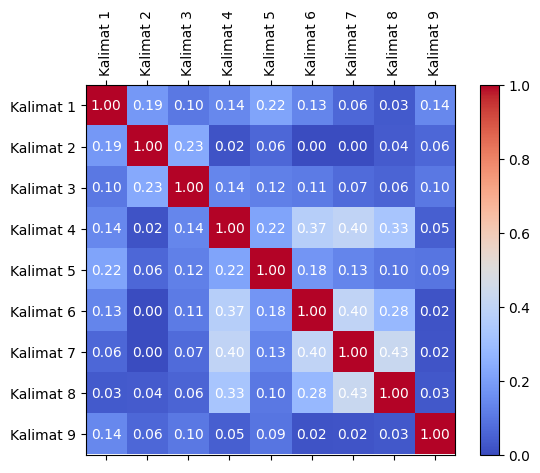

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Membuat grafik matriks
fig, ax = plt.subplots()
cax = ax.matshow(df, cmap='coolwarm')
fig.colorbar(cax)

# Memberi label pada sumbu X dan Y
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.index)

# Menampilkan nilai similarity pada matriks
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, f'{df.iat[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()

## Menghitung Closeness Centrality

In [10]:
import networkx as nx

# Buat grafik dari matriks similarity
G = nx.Graph()

# Tambahkan simpul (node) ke grafik yang mewakili setiap kalimat
for sentence in sentences:
    G.add_node(sentence)

# Tambahkan tepi (edge) antara kalimat berdasarkan similarity
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity = df.iloc[i, j]  # Mengambil similarity dari DataFrame
        if similarity > 0:
            G.add_edge(sentences[i], sentences[j], weight=similarity)

# Hitung closeness centrality untuk setiap simpul
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Cetak closeness centrality
for sentence, centrality in closeness_centrality.items():
    print(f"Closeness Centrality of {sentence}: {centrality:.4f}")

Closeness Centrality of 
				jakarta antara  badan meteorologi klimatologi dan geofisika bmkg ri mengeluarkan peringatan dini potensi hujan yang disertai kilat dan angin kencang yang akan terjadi di wilayah kota administrasi jakarta selatan selasa  november .: 12.6196
Closeness Centrality of mengutip laporan bmkg yang melansir melalui laman resminya selasa disebutkan bahwa kondisi cuaca yang kurang bersahabat tersebut akan berlangsung pada selasa sore hingga menjelang malam.: 15.7311
Closeness Centrality of namun berdasarkan kalkulasi bmkg dalam laporannya tersebut kondisi cuaca di jakarta selatan akan diawali dengan cerah berawan pada pagi lalu berangsur menjadi hujan ringan pada siang hingga malam hari.: 10.6880
Closeness Centrality of bmkg menyebutkan suhu di jakarta selatan berkisar  derajat celcius dengan tingkat kelembapan dalam kisaran terendah  persen dan tertinggi  persen.: 15.2279
Closeness Centrality of tingkat suhu dan kelembapan serupa juga tercatat akan terjadi pada wilay

## Membuat Graph

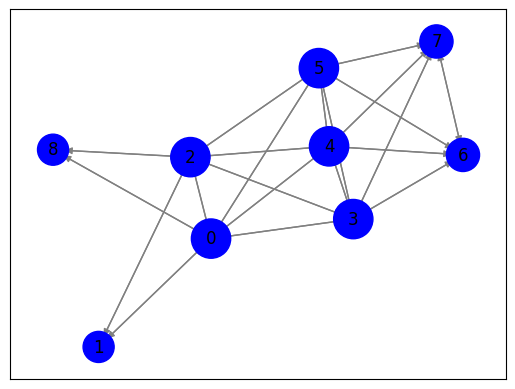

Closeness Centrality:
Node 0: 0.8000
Node 1: 0.5000
Node 2: 0.8000
Node 3: 0.8000
Node 4: 0.8000
Node 5: 0.8000
Node 6: 0.5714
Node 7: 0.5714
Node 8: 0.5000


In [13]:
import networkx as nx

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0.1 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j)

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Visualisasi closeness centrality
pos = nx.spring_layout(G)  # Atur layout grafik
node_size = [v * 1000 for v in closeness_centrality.values()]  # Ubah ukuran node berdasarkan closeness centrality, dengan faktor pengurangan ukuran

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

# Cetak closeness centrality
print("Closeness Centrality:")
for node, closeness in closeness_centrality.items():
    print(f"Node {node}: {closeness:.4f}")


## Ranking Kalimat Berdasarkan Closeness Centrality

In [14]:
import networkx as nx
import numpy as np

# Fungsi untuk mendapatkan indeks kalimat dengan closeness centrality terbesar
def get_top_sentences(closeness_centrality):
    sorted_indices = np.argsort(list(closeness_centrality.values()))[::-1]
    return sorted_indices

# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0.1 and i != j:
            G.add_edge(i, j)

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Mendapatkan indeks kalimat dengan closeness centrality terbesar
top_sentences_indices = get_top_sentences(closeness_centrality)

# Tampilkan nilai closeness centrality
num_top_sentences = 3
for i in range(num_top_sentences):
    top_sentence_index = top_sentences_indices[i]
    closeness_value = closeness_centrality[top_sentence_index]
    top_sentence = sentences[top_sentence_index]
    print(f"Ranking {i + 1}: Kalimat {top_sentence_index + 1} - {top_sentence}")
    print(f"   Closeness Centrality: {closeness_value:.4f}\n")

Ranking 1: Kalimat 6 - untuk suhu di kawasan jakarta utara dan jakarta pusat diprediksi dalam rentang  derajat dengan kelembapan udara  persen.
   Closeness Centrality: 0.8000

Ranking 2: Kalimat 5 - tingkat suhu dan kelembapan serupa juga tercatat akan terjadi pada wilayah jakarta timur.
   Closeness Centrality: 0.8000

Ranking 3: Kalimat 4 - bmkg menyebutkan suhu di jakarta selatan berkisar  derajat celcius dengan tingkat kelembapan dalam kisaran terendah  persen dan tertinggi  persen.
   Closeness Centrality: 0.8000



## Ranking Kalimat Berdasarkan Pagerank

In [15]:
import networkx as nx
import numpy as np

# Fungsi untuk mendapatkan indeks kalimat dengan nilai tertinggi dari suatu metrik
def get_top_sentences(metric_values):
    sorted_indices = np.argsort(metric_values)[::-1]
    return sorted_indices

# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0.1 and i != j:
            G.add_edge(i, j)

# Hitung PageRank
pagerank = nx.pagerank(G)

# Mendapatkan indeks kalimat dengan nilai tertinggi dari PageRank
top_sentences_pagerank = get_top_sentences(list(pagerank.values()))

# Tampilkan nilai PageRank
num_top_sentences = 3
for i in range(num_top_sentences):
    top_sentence_index = top_sentences_pagerank[i]
    pagerank_value = pagerank[top_sentence_index]
    top_sentence = sentences[top_sentence_index]
    print(f"Ranking {i + 1}: Kalimat {top_sentence_index + 1} - {top_sentence}")
    print(f"   PageRank Value: {pagerank_value:.4f}\n")

Ranking 1: Kalimat 3 - namun berdasarkan kalkulasi bmkg dalam laporannya tersebut kondisi cuaca di jakarta selatan akan diawali dengan cerah berawan pada pagi lalu berangsur menjadi hujan ringan pada siang hingga malam hari.
   PageRank Value: 0.1437

Ranking 2: Kalimat 1 - 
				jakarta antara  badan meteorologi klimatologi dan geofisika bmkg ri mengeluarkan peringatan dini potensi hujan yang disertai kilat dan angin kencang yang akan terjadi di wilayah kota administrasi jakarta selatan selasa  november .
   PageRank Value: 0.1437

Ranking 3: Kalimat 6 - untuk suhu di kawasan jakarta utara dan jakarta pusat diprediksi dalam rentang  derajat dengan kelembapan udara  persen.
   PageRank Value: 0.1362



## Ranking Kalimat Berdasarkan Eigen Vector Centrality

In [16]:
import networkx as nx
import numpy as np

# Fungsi untuk mendapatkan indeks kalimat dengan nilai tertinggi dari suatu metrik
def get_top_sentences(metric_values):
    sorted_indices = np.argsort(metric_values)[::-1]
    return sorted_indices

# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0.1 and i != j:
            G.add_edge(i, j)

# Hitung Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality_numpy(G)

# Mendapatkan indeks kalimat dengan nilai tertinggi dari Eigenvector Centrality
top_sentences_eigenvector = get_top_sentences(list(eigenvector_centrality.values()))

# Tampilkan kalimat dengan Eigenvector Centrality terbesar
num_top_sentences = 3
# Tampilkan nilai Eigenvector Centrality
for i in range(num_top_sentences):
    top_sentence_index = top_sentences_eigenvector[i]
    eigenvector_value = eigenvector_centrality[top_sentence_index]
    top_sentence = sentences[top_sentence_index]
    print(f"Ranking {i + 1}: Kalimat {top_sentence_index + 1} - {top_sentence}")
    print(f"   Eigenvector Centrality: {eigenvector_value:.4f}\n")

Ranking 1: Kalimat 6 - untuk suhu di kawasan jakarta utara dan jakarta pusat diprediksi dalam rentang  derajat dengan kelembapan udara  persen.
   Eigenvector Centrality: 0.4154

Ranking 2: Kalimat 4 - bmkg menyebutkan suhu di jakarta selatan berkisar  derajat celcius dengan tingkat kelembapan dalam kisaran terendah  persen dan tertinggi  persen.
   Eigenvector Centrality: 0.4154

Ranking 3: Kalimat 5 - tingkat suhu dan kelembapan serupa juga tercatat akan terjadi pada wilayah jakarta timur.
   Eigenvector Centrality: 0.4154

